# EDA
###### EDA (Exploratory Data Analysis) adalah proses analisis data untuk memahami karakteristik, distribusi, dan hubungan antar variabel dalam dataset. Tujuan utama dari EDA (Exploratory Data Analysis) adalah untuk memahami dataset yang sedang dianalisis secara lebih dalam dan menemukan informasi yang mungkin tersembunyi atau tidak terlihat pada awalnya. EDA membantu dalam memvalidasi hipotesis awal dan menghasilkan wawasan baru dari data yang dapat digunakan untuk mengambil keputusan.

###### Dalam EDA, analis dapat memvisualisasikan data dan menjelajahi hubungan antar variabel dalam dataset. Misalnya, apakah ada korelasi antara variabel tertentu, apakah ada pola tertentu dalam data yang muncul pada rentang waktu tertentu, dan apakah ada outliers atau data yang tidak biasa dalam dataset.

# Import dan Read Data

In [62]:
import pandas as pd 

In [63]:
df = pd.read_csv('data.csv')
df.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7


# Melakukan Simple EDA

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17613 entries, 0 to 17612
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    17613 non-null  object
 1   Province                17613 non-null  object
 2   Daily_Case              17613 non-null  int64 
 3   Daily_Death             17613 non-null  int64 
 4   Daily_Recovered         17613 non-null  int64 
 5   Active_Case             17613 non-null  int64 
 6   Cumulative_Case         17613 non-null  int64 
 7   Cumulative_Recovered    17613 non-null  int64 
 8   Cumulative_Death        17613 non-null  int64 
 9   Cumulative_Active_Case  17613 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


##### Cek Missing Value

In [65]:
df.isna().values.any()

False

##### Cek Outlier Menggunakan plot

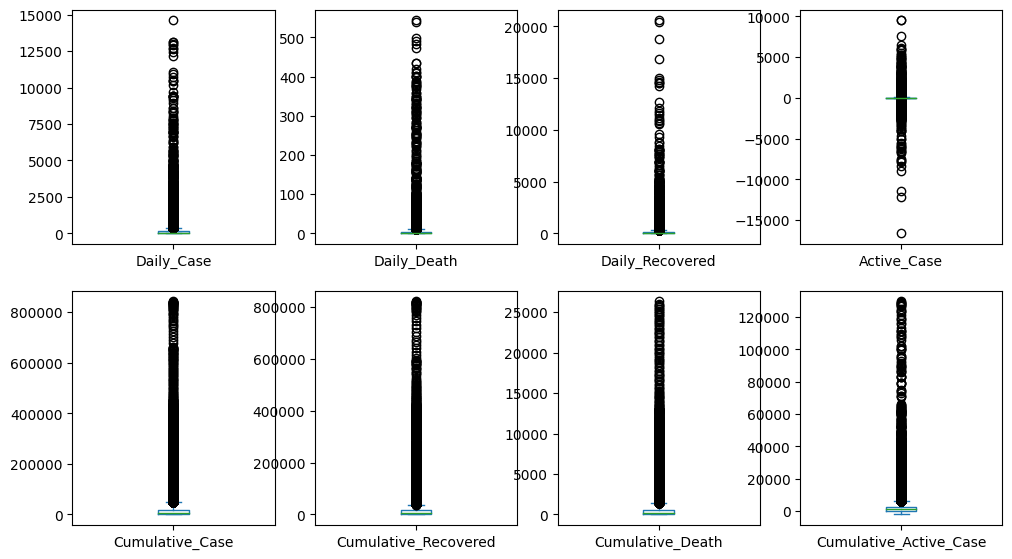

In [66]:
df.plot(subplots = True, layout = (4,4), kind = 'box', figsize = (12,14));

##### Menghapus baris yang berisi Outlier dengan menetapkan batas atas dan bawah

In [85]:
# Menetapkan batas outlier
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Menghapus baris yang berisi outlier
df = df[(df > lower_bound) & (df < upper_bound)]

C:\Users\deo pandia\AppData\Local\Temp\ipykernel_16040\2588619903.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\deo pandia\AppData\Local\Temp\ipykernel_16040\2588619903.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
C:\Users\deo pandia\AppData\Local\Temp\ipykernel_16040\2588619903.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[(df > lower_bound) & (df < upper_bound)]


##### Setelah dilakukan penghapusan outlier

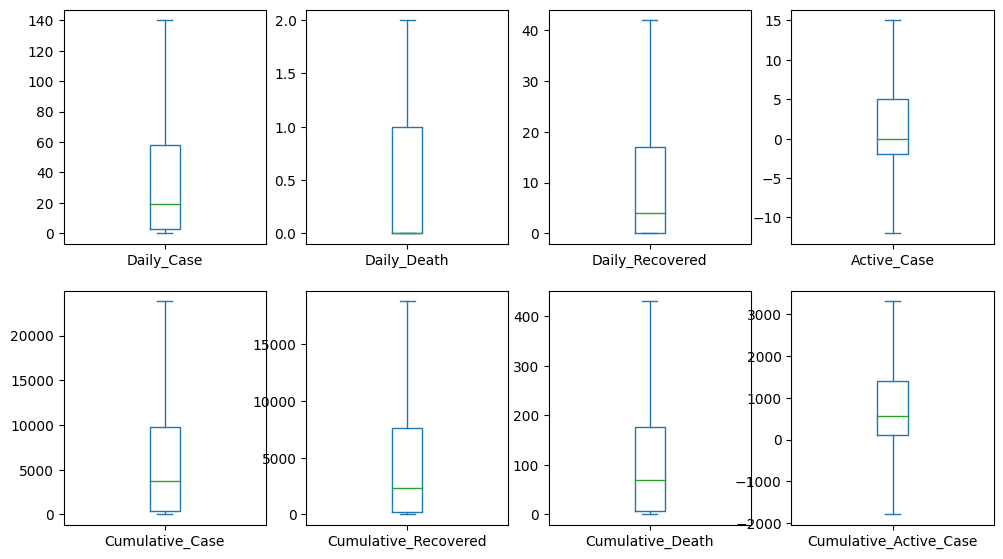

In [86]:
df.plot(subplots = True, layout = (4,4), kind = 'box', figsize = (12,14));

##### Cek baris yang terduplikasi

In [87]:
df.duplicated().values.any()

True

##### Menghapus baris yang terduplikasi

In [88]:
df.drop_duplicates(inplace=True)

In [90]:
df.duplicated().values.any()

False

##### Deskripsi Data

In [91]:
df.describe()

,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
count,12387.000000,11068.000000,9337.000000,6845.000000,13092.000000,12982.000000,11408.000000,13437.000000
mean,36.587148,0.480304,10.626647,1.465157,6199.065842,4702.374596,114.750000,905.095929
std,37.976223,0.717207,11.890129,6.342676,6299.305233,5025.766105,116.140804,873.430440
min,0.000000,0.000000,0.000000,-12.000000,1.000000,0.000000,0.000000,-1797.000000
25%,5.000000,0.000000,0.000000,-2.000000,644.750000,317.250000,13.000000,158.000000
50%,22.000000,0.000000,6.000000,1.000000,4217.000000,2850.000000,80.000000,612.000000
75%,61.000000,1.000000,18.000000,6.000000,10113.500000,7913.000000,184.000000,1445.000000
max,140.000000,2.000000,42.000000,15.000000,23806.000000,18726.000000,430.000000,3311.000000


# Data Visualisasi

##### Import Modul

In [93]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

##### Cek Korelasi Antar Tabel

C:\Users\deo pandia\AppData\Local\Temp\ipykernel_16040\1660155198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =df.corr()


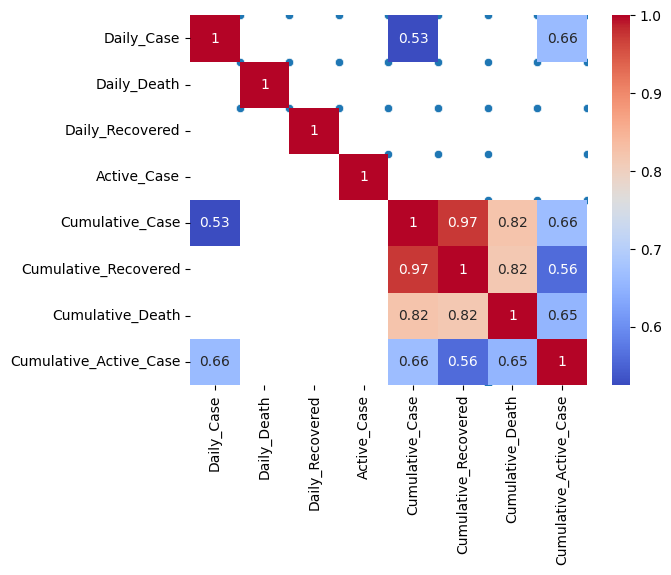

In [100]:
corr_matrix =df.corr()
# memilih variabel dengan korelasi lebih dari 0.5 atau kurang dari -0.5
strong_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# membuat scatter plot
sns.scatterplot(x='Cumulative_Case', y='Cumulative_Death', data=df)

# membuat heatmap
sns.heatmap(strong_corr, cmap='coolwarm', annot=True)
plt.show()

# Visualisasi Tabel Tabel Yang Memiliki Korelasi Kuat

##### Barplot

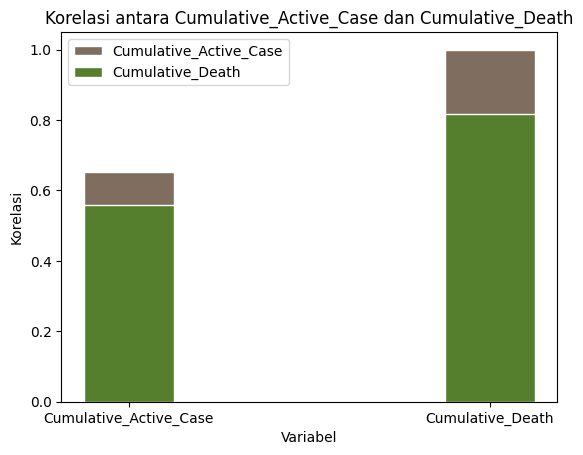

In [109]:
import numpy as np

# Membuat data
x = np.array(["Cumulative_Active_Case", "Cumulative_Death"])
y1 = np.array([0.652027, 1.0])
y2 = np.array([0.558663, 0.815668])

# Mengatur lebar bar
barWidth = 0.25

# Membuat bar chart
plt.bar(x, y1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Cumulative_Active_Case')
plt.bar(x, y2, color='#557f2d', width=barWidth, edgecolor='white', label='Cumulative_Death')

# Menambahkan label dan judul
plt.xlabel("Variabel")
plt.ylabel("Korelasi")
plt.title("Korelasi antara Cumulative_Active_Case dan Cumulative_Death")

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


##### Histogram

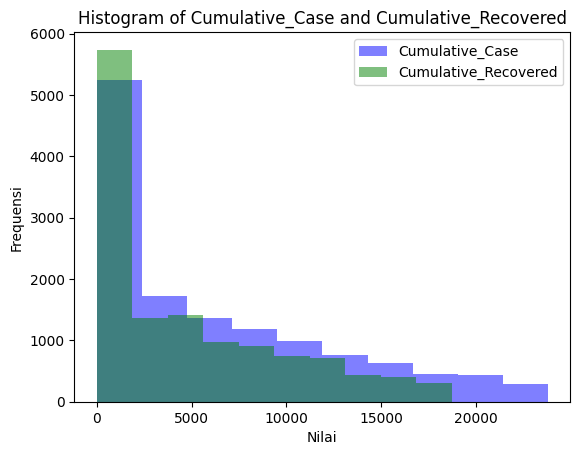

In [108]:
# plot histogram untuk Cumulative_Case
plt.hist(df['Cumulative_Case'], bins=10, color='blue', alpha=0.5, label='Cumulative_Case')

# plot histogram untuk Cumulative_Recovered
plt.hist(df['Cumulative_Recovered'], bins=10, color='green', alpha=0.5, label='Cumulative_Recovered')

# atur label pada sumbu x dan y
plt.xlabel('Nilai')
plt.ylabel('Frequensi')

# atur judul grafik
plt.title('Histogram of Cumulative_Case and Cumulative_Recovered')

# tampilkan legenda
plt.legend()

# tampilkan plot
plt.show()

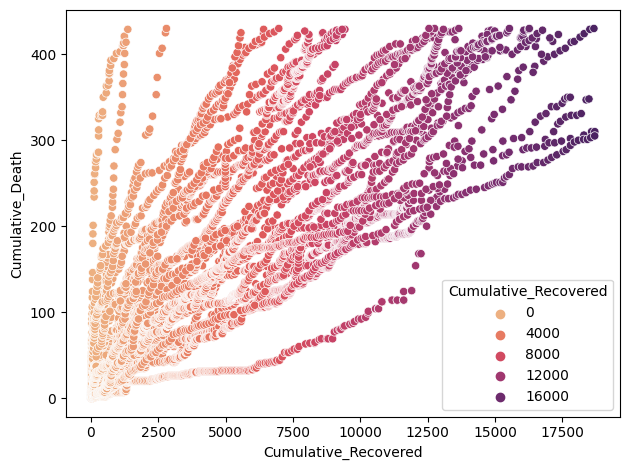

In [115]:
sns.scatterplot(data=df, x="Cumulative_Recovered", y="Cumulative_Death", hue="Cumulative_Recovered", palette="flare")
plt.tight_layout()
plt.show()
